# Lab 8: Supervised Learning  

In this lab, we will keep working on supervised learning. We will first learn how to train decision trees and we will see that doing this using `sklearn` is not much different from running kNN algorithm.

## Lab 8.A: Decision Trees (50% of grade)

The following code is copied from http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py. You should be able to run the code without error messages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris= load_iris()
print iris

{'target_names': array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10'), 'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.

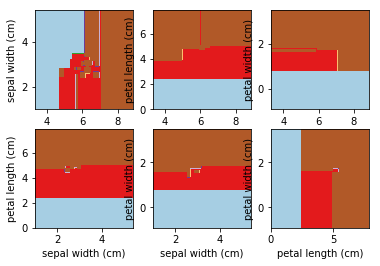

In [381]:
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier()
    clf.fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
    

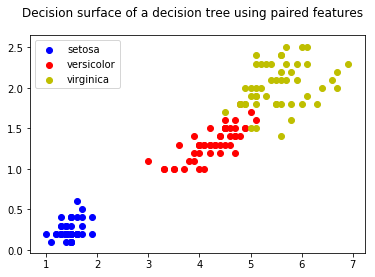

In [382]:
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

**Question 1**. Study the code and try to understand what is happening in each line. Explain what the images plotted by the code show.


- enumerate create a list that this for loop to go through this list contain 6 pair of atttributes that we want to apply classification on to train
- Call data set (base of pair of attributes) X
- Call the flower cordinate with it y
- Plot the decision boundary
- Get x_min, x_max, y_min, y_max from X and y data
- np.meshgrid Return coordinate matrices from two or more coordinate vectors.
- np.arange(y_min, y_max, h)) return evenly spaced values within a given interval.
- xx and yy will be all the value will be plot on the chart
- Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) Perform classification on samples in data set np.c_[xx.ravel(), yy.ravel()].
- xx.ravel() and yy.ravel() will return a contiguous flattened array so xx and yy will be 2 arrays have 1 row each
- np.c_ will translates slice objects to concatenation along the second axis.
- clf.predict will make a classification of this array. This will return an array with predict value
- contour() and contourf() draw contour lines and filled contours, respectively. Except as noted, function signatures and return values are the same for both versions.
- Put the result into a color plot
- reshape the same of Z so it has the same shape with xx
- Plot the data

**Question 2**. Train a decision tree on Iris data set using all 4 attributes. Before training, remember to reserve 50 randomly selected examples for test set and train on the remaining 100 examples. Use the default parameter values (no need to put anything in parenthesis in `DecisionTreeClassifier`). How long did it take to train the decision tree? Report the accuracy on the test set. Print the confusion matrix. Report the accuracy on the training set. Discuss if you are seeing any difference and why. Compare the accurracy with the accuracy you got with kNN. Report on the size of the resulting tree (how many nodes are there and what is the depth of the tree). Visualize the tree (consider using `sklearn.tree.export_graphviz`).

In [383]:
import time
from sklearn import tree
# Load data
iris = load_iris()
X = iris.data
y = iris.target

In [384]:
#remember to reserve 50 randomly selected examples for test set and train on the remaining 100 examples.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)
#print X_train.shape

- Train decisionTree, How long did it take to train the decision tree?

In [385]:
#record now time
start_time = time.time()
predictor = tree.DecisionTreeClassifier()
predictor.fit(X_train, y_train);
#total run time = new time - start time
print("How long did it take to train the decision tree?")
print("Run Time: %s seconds" % (time.time() - start_time))

How long did it take to train the decision tree?
Run Time: 0.0016930103302 seconds


Accuracy on test data set

In [386]:

#record now time
start_time = time.time()
# select all test examples/
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
x = X_test[i,:]
# predict its label
yhat = predictor.predict(x)
print yhat
print y_test
#total run time = new time - start time
print("Run Time: %s seconds" % (time.time() - start_time))
accuracy = predictor.score(X_test,y_test)
print "Accuracy: ", accuracy,"%"

[0 0 0 0 2 0 2 0 2 1 0 0 1 0 0 2 2 0 1 1 0 1 1 0 2 0 1 0 1 0 1 2 0 0 2 2 2
 0 1 2 0 2 0 1 2 1 1 0 2 2]
[0 0 0 0 2 0 2 0 2 1 0 0 1 0 0 2 2 0 1 1 0 1 1 0 2 0 1 0 1 0 1 2 0 0 2 2 1
 0 2 2 0 2 0 1 1 1 1 0 2 2]
Run Time: 0.00402593612671 seconds
Accuracy:  0.94 %


- Print the confusion matrix.

In [387]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

array([[22,  0,  0],
       [ 0, 12,  2],
       [ 0,  1, 13]])

- Accuracy on training data set is 100% which is higher than testing data set less than 10% for most of the time this lab was running

In [2]:
i = np.arange(X_train.shape[0])
i[0:X_train.shape[0]]
x1 = X_train[i,:]
# predict its label
yhat1 = predictor.predict(x1)
print yhat1
print y_train
accuracy = predictor.score(X_train,y_train)
print "Accuracy: ", accuracy

NameError: name 'np' is not defined

- Perform KKN

In [389]:
from sklearn import neighbors, datasets
#Let us train the kNN predictor:
#from sklearn.neighbors import KNeighborsClassifier
k = 1   # number of nearest neighbors
predictor1 = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor1.fit(X_train, y_train);
#print predictor
# select all test examples
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
x = X_test[i,:]


# predict its label
yhat = predictor1.predict(x)
accuracy = predictor1.score(X_test,y_test)
print "K: ",k," Accuracy: ", accuracy,"%"

K:  1  Accuracy:  0.96 %


-> KKN and and Decision Tree gave similar result/ accuracy

- Report on the size of the resulting tree (how many nodes are there and what is the depth of the tree). Visualize the tree (consider using sklearn.tree.export_graphviz).

In [407]:
import graphviz 
#dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph
from sklearn import tree
tree.export_graphviz(predictor,out_file='tree.dot')

In [411]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  

- I had trouble install Graphviz. I installed suscessful but keep giving me: to failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH
- There for I export the file tree.dot
- Below is the contain of tree.dot
- digraph Tree {
- node [shape=box] ;
 0 [label="X[3] <= 0.8\ngini = 0.662\nsamples = 100\nvalue = [28, 36, 36]"] ;
1 [label="gini = 0.0\nsamples = 28\nvalue = [28, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[2] <= 4.75\ngini = 0.5\nsamples = 72\nvalue = [0, 36, 36]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]"] ;
2 -> 3 ;
4 [label="X[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 4, 36]"] ;
2 -> 4 ;
5 [label="X[3] <= 1.65\ngini = 0.494\nsamples = 9\nvalue = [0, 4, 5]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]"] ;
5 -> 6 ;
7 [label="X[1] <= 3.1\ngini = 0.278\nsamples = 6\nvalue = [0, 1, 5]"] ;
5 -> 7 ;
8 [label="gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]"] ;
7 -> 8 ;
9 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]"] ;
4 -> 10 ;
}


In [405]:
n_nodes = predictor.tree_.node_count
print"Number of nodes: " , n_nodes

Number of nodes:  11


In [406]:
depth = predictor.tree_.max_depth
print depth

5


**Question 3**. Train a decision tree on Iris data, but this time play with the parameters. You can se the detailed list of different choices at http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier. Experiment with `criterion` (default is `gini`, try to train using `entropy`), `max_depth` (try to set it to 2, 3, 4), `min_samples_leaf` (default is 1, try with 5, 15). See if you can find a combination of parameters that improves accuracy on the test set. Report what you found.

In [77]:
predictor = DecisionTreeClassifier(criterion="entropy", max_depth=5, max_leaf_nodes=15)
predictor.fit(X_train, y_train);
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
x = X_test[i,:]
# predict its label
yhat = predictor.predict(x)
print yhat
print y_test
accuracy = predictor.score(X_test,y_test)
print "Accuracy: ", accuracy,"%"

[1 2 1 0 1 0 0 0 1 2 1 2 1 2 2 1 1 0 2 2 2 1 1 0 0 0 0 0 1 2 2 1 1 1 1 0 2
 2 1 0 0 1 2 0 2 1 2 2 2 0]
[1 2 1 0 1 0 0 0 1 1 1 2 1 2 2 1 1 0 2 2 2 1 1 0 0 0 0 0 1 2 2 2 1 1 1 0 2
 2 1 0 0 1 2 0 2 1 2 2 2 0]
Accuracy:  0.96 %


Criterion="entropy", max_depth=5, max_leaf_nodes=15 is the combination of parameters that I found to improves the accuracy on the test set
- criterion : The function to measure the quality of a split. Splitter : string, optional (default=”best”)
- max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure. We set for 5 so maximun depth is always 5 
- max_leaf_nodes : Grow a tree with max_leaf_nodes in best-first 
- The higher the max_leaf_nodes, the better the result, gini or entropy doesn't really change the resut.
- max_depth less than 2 gave poor result but >5 the result is the same

## Lab 8.B. Doing supervised learning on churn data set (50 points)

In this part of the lab, you will be using kNN and decision trees on the problem of churn prediction. 

In [243]:
import pandas as pd
#data set from yhathq: http://blog.yhathq.com/posts/predicting-customer-churn-with-sklearn.html
dfchurn=pd.read_csv("https://raw.githubusercontent.com/CIS3715-temple-2018/CIS3715-temple-2018.github.io/master/churn.csv")
dfchurn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


This is a dataset from a telecom company, of their customers. Based on the recorded attributes of these customers and their calling plans, we want to predict if a customer is likely to leave the company (the last column in the table). This is expensive for the company, as a lost customer means lost monthly revenue.

**Question 4**. Perform EDA on the data set to get an insight into the data, including answering what fraction of customers left the company, what are attributes about, what are their properties, how are attributes and the churn related. Prepare 1-2 page document summarizing the interesting aspects of the data.

In [244]:
print (list(dfchurn.columns))

['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


In [245]:
pd.crosstab(dfchurn["State"],dfchurn["Area Code"],margins=True)

Area Code,408,415,510,All
State,,,,
AK,14,24,14,52
AL,25,40,15,80
AR,13,27,15,55
AZ,15,36,13,64
CA,7,17,10,34
CO,25,29,12,66
CT,22,39,13,74
DC,14,27,13,54
DE,13,31,17,61


In [246]:
pd.crosstab(dfchurn["State"],dfchurn["Churn?"],margins=True)

Churn?,False.,True.,All
State,,,
AK,49,3,52
AL,72,8,80
AR,44,11,55
AZ,60,4,64
CA,25,9,34
CO,57,9,66
CT,62,12,74
DC,49,5,54
DE,52,9,61


In [247]:
pd.crosstab(dfchurn["Area Code"],dfchurn["Churn?"],margins=True)

Churn?,False.,True.,All
Area Code,,,
408,716,122,838
415,1419,236,1655
510,715,125,840
All,2850,483,3333


Text(0,0.5,u'Count')

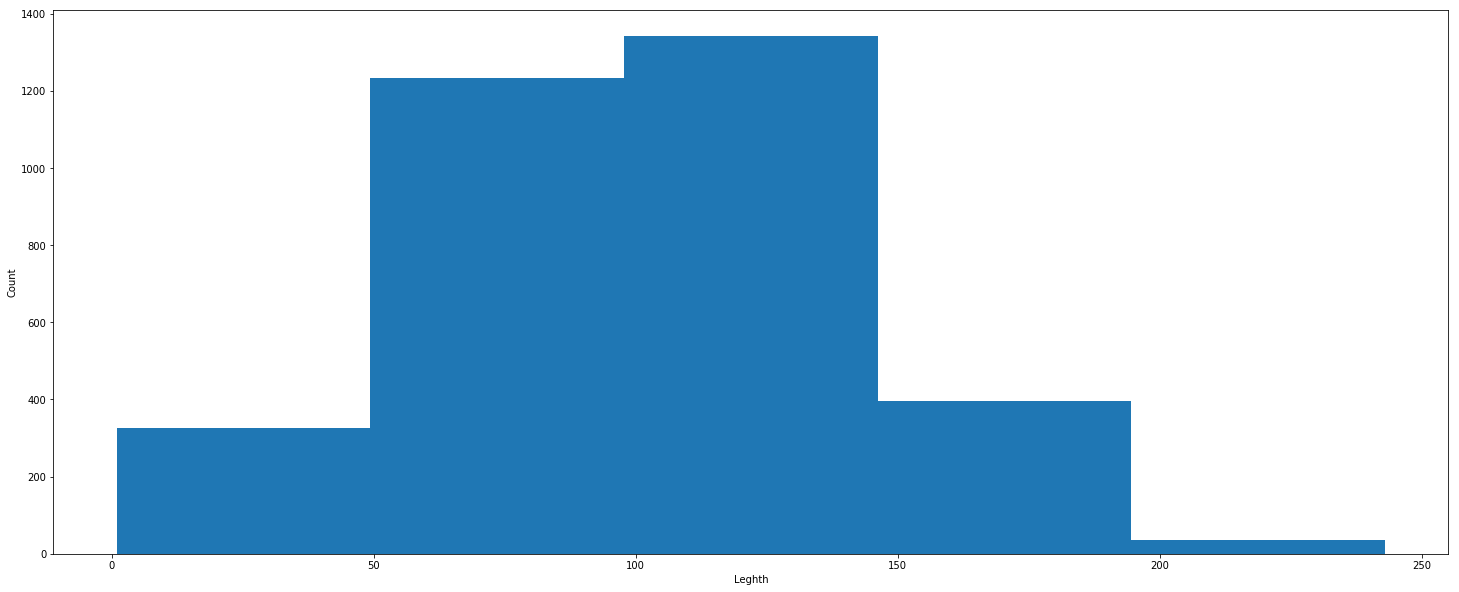

In [248]:
fig = plt.figure(figsize=(25,10))
plt.hist(dfchurn['Account Length'], bins=5); 
plt.xlabel('Leghth')
plt.ylabel('Count')

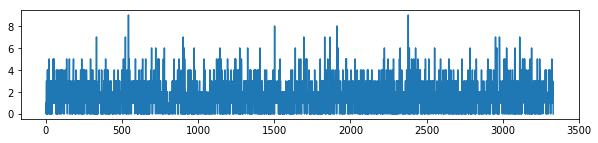

In [250]:
plt.figure(figsize=(10,2))  # can control the size of the display
plt.plot(dfchurn['CustServ Calls']);      # display attribute

In [251]:
fortymale = dfchurn[(dfchurn['CustServ Calls'] == 2)]
print fortymale

     State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
3       OH              84        408  375-9999        yes         no   
23      SC             111        415  350-2565         no         no   
30      IL             142        415  416-8428         no         no   
42      AR              34        510  353-7289         no         no   
45      OR              59        408  353-3061         no        yes   
47      DE             142        408  364-1995         no         no   
52      VA              10        408  349-4396         no         no   
53      UT              96        415  404-3211         no         no   
61      CA             116        415  405-3371         no        yes   
62      MN              74        510  344-5117         no        yes   
64      NC              38        408  359-4081         no         no   
65      WA              40        415  352-8305         no        yes   
78      MN              46        415  355-8887    

In [252]:
pd.crosstab(dfchurn["CustServ Calls"],dfchurn["Churn?"],margins=True)

Churn?,False.,True.,All
CustServ Calls,,,
0,605,92,697
1,1059,122,1181
2,672,87,759
3,385,44,429
4,90,76,166
5,26,40,66
6,8,14,22
7,4,5,9
8,1,1,2


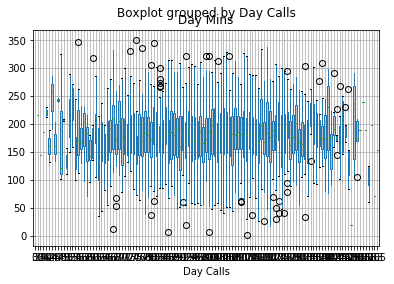

In [253]:
dfchurn.boxplot(column='Day Mins',by='Day Calls');


Text(0,0.5,u'Count')

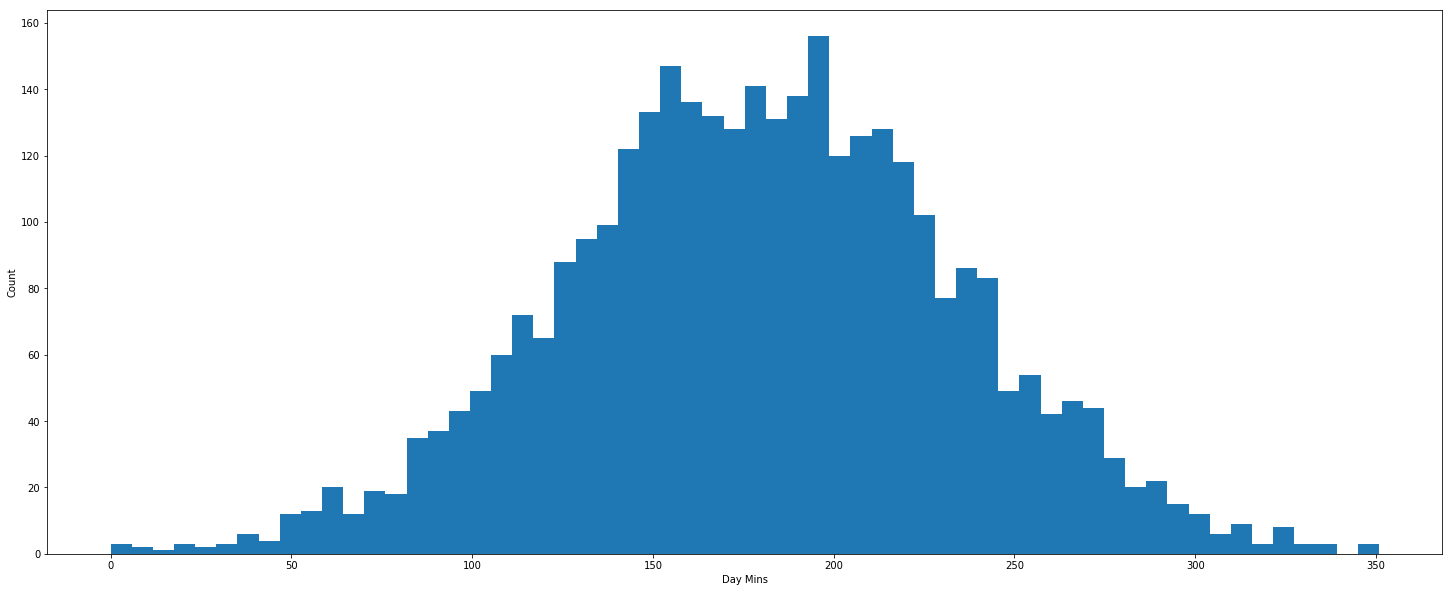

In [412]:
fig = plt.figure(figsize=(25,10))
plt.hist(dfchurn['Day Mins'], bins=60); 
plt.xlabel('Day Mins')
plt.ylabel('Count')

Text(0,0.5,u'Count')

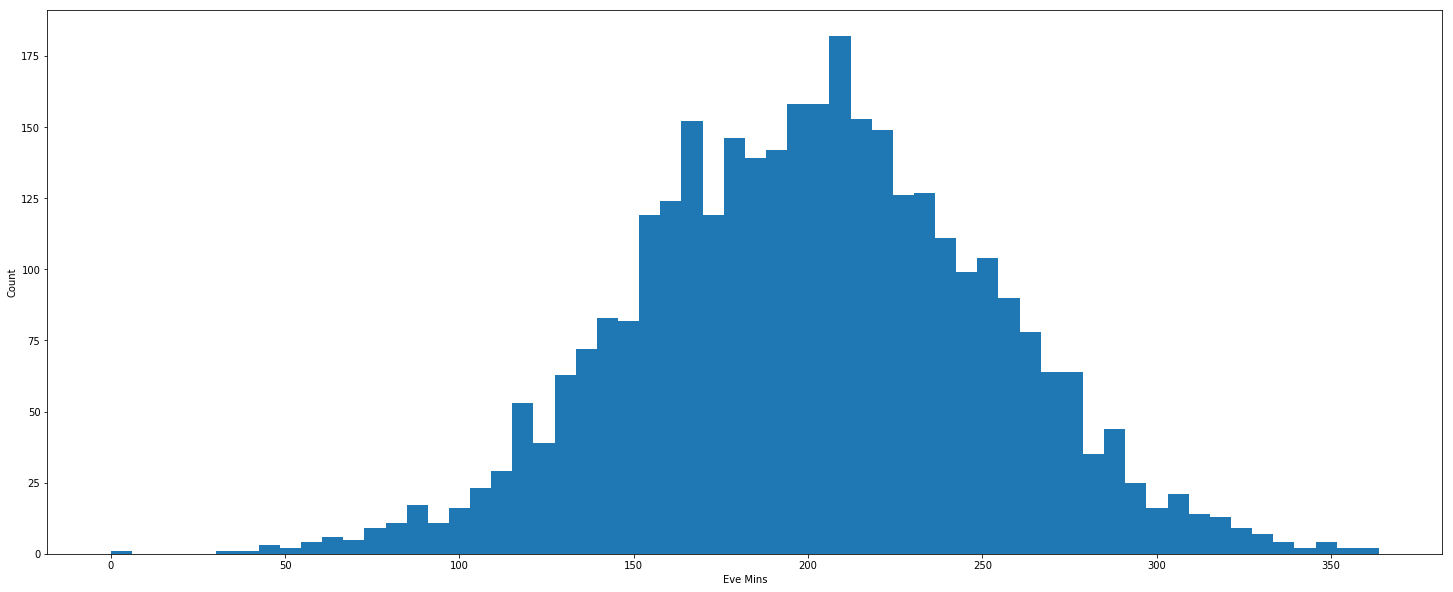

In [413]:
fig = plt.figure(figsize=(25,10))
plt.hist(dfchurn['Eve Mins'], bins=60); 
plt.xlabel('Eve Mins')
plt.ylabel('Count')

In [256]:
t= dfchurn['VMail Plan']

**Question 5**. Train and test a kNN classifier. First, select 1,000 random customers and save them for testing. You can use the remaining ones for training. Then, you will need to decide what to do with the categorical attributes. The easiest is to simply ignore them, but it would reduce your accuracy. A better way (you have to try it) is to convert the categorical attributes to numbers. It is up to you to decide what distance measure to use, how to pick `k`, and make any other decision that will help you increase the accuracy. For example, it might help you to scale the attributes to the same range. Remember that any transformation you do on the training data needs to be repeated on the test data. Report on the best accuracy you are able to get (please do not forget to split the data into training and test before proceeding). Also report the confusion matrix. Provide a discussion of your choices.

In [257]:
dfchurn.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

- There is 5 datatype is object. We need to find a way to represent this object to number type
- There are 2 column yes no we can replace with binary (1: yes, 2: no): Int'l Plan, VMail Plan

In [258]:
dfchurn["Int'l Plan"].value_counts()

no     3010
yes     323
Name: Int'l Plan, dtype: int64

In [259]:
cleanup_nums = {"Int'l Plan":     {"yes": 1, "no": 0},
                "VMail Plan": {"yes": 1, "no": 0}}
dfchurn.replace(cleanup_nums, inplace=True)
dfchurn.head()


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


- Check dfchurn.dtypes again we see that there is only 3 comlumn have object datatype
- We are sucess.
- With phone number we can take it out and store at separate place since it doesn't contribute to the training
- We will also represent the state by number 
- with the churn? column, we will reparate it out into a ndarray and make it became y

In [260]:
dfchurn.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan          int64
VMail Plan          int64
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [261]:

cleanup_state = {"State":     {'AK': 1,
                               'AL': 2,
                               'AR': 3,
                               'AS': 4,
                               'AZ': 5,
                               'CA': 6,
        'CO': 7,
        'CT': 8,
        'DC': 9,
        'DE': 10,
        'FL': 11,
        'GA': 12,
        'GU': 13,
        'HI': 14,
        'IA': 15,
        'ID': 16,
        'IL': 17,
        'IN': 18,
        'KS': 19,
        'KY': 20,
        'LA': 21,
        'MA': 22,
        'MD': 23,
        'ME': 24,
        'MI': 25,
        'MN': 26,
        'MO': 27,
        'MP': 28,
        'MS': 29,
        'MT': 30,
        'NA': 31,
        'NC': 32,
        'ND': 33,
        'NE': 34,
        'NH': 35,
        'NJ': 36,
        'NM': 37,
        'NV': 38,
        'NY': 39,
        'OH': 40,
        'OK': 41,
        'OR': 42,
        'PA': 43,
        'PR': 44,
        'RI': 45,
        'SC': 46,
        'SD': 47,
        'TN': 48,
        'TX': 49,
        'UT': 50,
        'VA': 51,
        'VI': 52,
        'VT': 53,
        'WA': 54,
        'WI': 55,
        'WV': 56,
        'WY': 57,
}

                }
dfchurn.replace(cleanup_state, inplace=True)
dfchurn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,19,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,40,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,36,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,40,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,41,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [262]:
dfchurn.dtypes

State               int64
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan          int64
VMail Plan          int64
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [264]:
cleanup_tf = {"Churn?":     {"True.": 1, "False.": 0},}
dfchurn.replace(cleanup_tf, inplace=True)
dfchurn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,19,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,40,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,36,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,40,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,41,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


- After convert everything, we will remove the last column and make it become y1 ndarray for testing 

In [265]:
y1=dfchurn["Churn?"]
# make dataframe y1 became ndarray
y1=y1.values
print y1

[0 0 0 ... 0 0 0]


- Take out phone number and Churn columns make it it X1

In [266]:
#create X1 with out the last column
X1 = dfchurn.filter(['State', 'Account Length', 'Area Code', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls'], axis=1)
X1=X1.values
print X1


[[ 19.   128.   415.   ...   3.     2.7    1.  ]
 [ 40.   107.   415.   ...   3.     3.7    1.  ]
 [ 36.   137.   415.   ...   5.     3.29   0.  ]
 ...
 [ 45.    28.   510.   ...   6.     3.81   2.  ]
 [  8.   184.   510.   ...  10.     1.35   2.  ]
 [ 48.    74.   415.   ...   4.     3.7    0.  ]]


- Take 1000 row to test

In [416]:
# get 1000 customer as the test size
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=1000)

In [421]:
from sklearn import neighbors, datasets
#Let us train the kNN predictor:
#from sklearn.neighbors import KNeighborsClassifier
k = 30   # number of nearest neighbors
predictorKNN = neighbors.KNeighborsClassifier(n_neighbors = k)
predictorKNN.fit(X_train, y_train);
#print predictor
# select all test examples
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
x = X_test[i,:]
# predict its label
yhat = predictorKNN.predict(x)
accuracy = predictorKNN.score(X_test,y_test)
print "K: ",k," Accuracy: ", accuracy

K:  30  Accuracy:  0.87


- confusion matrix

In [422]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

array([[850,   4],
       [126,  20]])

- After going through the process to answer this question, I had understand so much more what is ndarray, dataframe and Testing and trainning data set.
- I can see the KKN or any classfication is a good way to learn about the data set.
- At first, looking at the big table of data, I was so underwhelming. Now I do understand much more about it. There is no way a human being can look at the big data and guess the corolation between attributes. Now I can see why is training/testing/classification is so helpful.


**Question 6**. Train and test a decision tree. Do it on the sane traing-test split you used in *Question 5*. Your goal is to try to figure out the best way to train an accurate decision tree. Report on your findings. Compare your results with the kNN results.

In [424]:
#record now time
start_time = time.time()
predictor = DecisionTreeClassifier()
predictor.fit(X_train, y_train);
# select all test examples/
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
x = X_test[i,:]
# predict its label
yhat = predictor.predict(x)
accuracy = predictor.score(X_test,y_test)
print "Accuracy: ", accuracy

Accuracy:  0.91


In [425]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

array([[811,  43],
       [ 47,  99]])

- After looking at the Accuracy, I can say that Decision Tree performed better than KKN.

**Question 7**. Lets assume you have to use your churn classifier to contact your existing customers and try try to prevent churn. The cost of each contact is \$10. Let us assume each contacted customer will decide to stay. Your profit in keeping a customer is \$30. Given your best decision tree and kNN classifiers, what is the expected profit on your test data? Can you try to train another classifier that would have even larger profit?

- If accuracy was about 92% than with 1000 customer called we predict, 80 will get wrong. => $$800 miss cost called
- But if we assume each contacted customer will decide to stay
- Cost to call 1000: $10000
- Profit: 30000 - 10000 - 800 = 19200
- We can change the parameters to make the accurancy go higher

In [433]:
#record now time
start_time = time.time()
predictor = DecisionTreeClassifier(criterion="entropy", max_depth=10, max_leaf_nodes=20)
predictor.fit(X_train, y_train);
# select all test examples/
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
x = X_test[i,:]
# predict its label
yhat = predictor.predict(x)
accuracy = predictor.score(X_test,y_test)
print "Accuracy: ", accuracy

Accuracy:  0.94


I was able to improve the performance by changing the parameter to : criterion="entropy", max_depth=5, max_leaf_nodes=15